Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel → Restart) and then run all cells (in the menubar, select Cell → Run All).

Make sure you fill in any place that says YOUR CODE HERE.
Do not write your answer in anywhere else other than where it says YOUR CODE HERE.

First, write your name and NetID below:

In [1]:
NAME = 'Daniel Moser'
NETID = 'dmoser2'

# Problem 7.2. Distance vs. Flight Time.

Use the 2001 [airline on-time performance data](http://stat-computing.org/dataexpo/2009/the-data.html) `2001.csv` to create a scatter plot of `Distance` vs. `ActualElapsedTime`. Although this problem does not have test cases (`assert` statements), you still have to use this template to write your code. Submit your IPython notebook onto Moodle for both instructor and peer assessment.

Here are some hints:

- You have to specify that the encoding is `latin-1`, e.g.
  ```python
  open(filename, encoding='latin-1')
  ```

- The column header for distance is `Distance` (distance between airports, in miles).
- For flight time, use `ActualElapsedTime` (elapsed time of flight, in minutes).
- There are missing values denoted by `NA`. You should not plot any data point that has `NA` in `Distance` or `ActualElapsedTime` columns.
- There are various ways to extract the columns you want from a CSV file. To give you a few examples,
  - You could use `awk` to extract the columns, save it in a separate file, and load this file in your IPython notebook. But your IPython notebook must be **self-contained** so provide your `awk` command in a cell prepended with `!` or `%%bash` magic functions.
  - You could modify the `get_column()` function from [Problem 5.1](https://github.com/UI-DataScience/info490-fa15/blob/master/Week5/assignment/fileio.ipynb). Note that you can't use the `get_column()` function without modification, because `ActualElapsedTime` and `Distance` columns have `NA` values in different rows. Again, your IPython notebooks should be self-contained, so provide your modified function in your notebook (rather than importing it as a module).
  - You could use the [csv module](https://docs.python.org/3/library/csv.html). Note that you still need to handle the missing values even with the `csv` module.
  - Although we haven't covered [Numpy](http://docs.scipy.org/doc/numpy/user/index.html) yet, you can also use [numpy.genfromtxt()](http://docs.scipy.org/doc/numpy/user/basics.io.genfromtxt.html) or [numpy.loadtxt()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). If you use these functions, be sure to specify the following options:
  
    ```python
    delimiter=','`, `skiprows=1`
    ```
    
    and

    ```python
    converters={11: lambda x: 0 if x == b'NA' else int(x),
                18: lambda x: 0 if x == b'NA' else int(x)}
    ```
    
    The above converter function will replace `NA` with 0. Therefore, you also need to remove all data points with 0, e.g.

    ```python
    mask = (airtime > 0) & (distance > 0)
    airtime = airtime[mask]
    distance = distance[mask]
    ```
  - We will cover [Pandas](http://pandas.pydata.org/) in the following weeks, but you could also use Pandas [read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

- The `2001.csv` file has over 5 million rows. Trying to plot all 5 million
  points in one scatter plot will result in waiting forever to process the plot,
  an IPython notebook with a very large file size, and an extremely cluttered
  plot. You can prevent this by plotting every *n*-th point. Use 
  [Python's extended slicing](https://docs.python.org/3.4/reference/datamodel.html) or
  [Numpy's
  slicing](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html),
  e.g. `array[::1000]` for every 1000-th point in the array.
- Always label your axes. Your figure should have a descriptive title, and
  also put your first and last name in the title.
- Common sense should tell you that `Distance` is a linear function of `ActualElapsedTime`. If your scatter plot doesn't look like it has a positive correlation, check your code (check especially how you handled missing values `NA`).

env: TEMP_HOME=/home/data_scientist/info490/info490-fa15/Week7/assignment
mkdir: cannot create directory ‘/home/data_scientist/info490/info490-fa15/Week7/assignment/data’: File exists
--2015-10-10 17:59:45--  http://stat-computing.org/dataexpo/2009/2001.csv.bz2
Resolving stat-computing.org (stat-computing.org)... 54.231.176.43
Connecting to stat-computing.org (stat-computing.org)|54.231.176.43|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83478700 (80M) [application/x-bzip2]
Server file no newer than local file ‘/home/data_scientist/info490/info490-fa15/Week7/assignment/data/2001.csv.bz2’ -- not retrieving.

bzip2: Output file /home/data_scientist/info490/info490-fa15/Week7/assignment/data/2001.csv already exists.


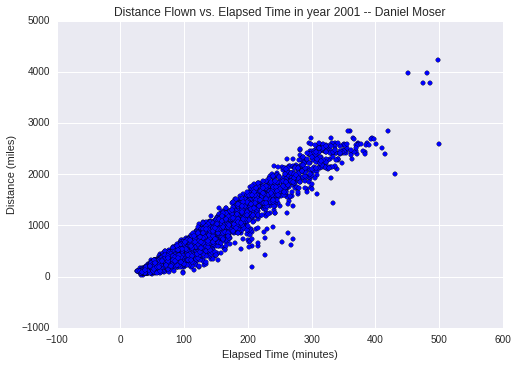

In [2]:
# IMPORTANT #
# Since data.csv is over 5 million lines long, the Python program will take a while to complete!
# Rest assured, it will complete as long as you do not interrupt it!!!

import os
from nose.tools import assert_equal, ok_

# set environment TEMP_HOME variable for working directory
temp_home = !pwd
%env TEMP_HOME=$temp_home.s

# check to make sure TEMP_HOME is set to working directory
assert_equal(temp_home.s, os.environ['TEMP_HOME']) 

# make data directory in TEMP_HOME and then check it operation was successful
!mkdir $TEMP_HOME/data
ok_(os.path.exists(os.path.join(temp_home.s, 'data')))

# download airline on-time performance data
# wget -N to turn on timestamping -- only downloads if new remote file exists
# wget -P to select directory 
!wget -N -P $TEMP_HOME/data http://stat-computing.org/dataexpo/2009/2001.csv.bz2
    
def get_checksum(filename):
    import hashlib
    with open(filename, 'rb') as f:
        md5 = hashlib.md5(f.read())
    return md5.hexdigest()

assert_equal(get_checksum(os.path.join(temp_home.s, 'data', '2001.csv.bz2')), 'e855ba7cc04f560199953833305a0f90')

# bzip2 -v for verbose ouput
# bzip2 -d for decompression
# bzip2 -k to keep input file
!bzip2 -v -d -k $TEMP_HOME/data/2001.csv.bz2

# store file name and path
input_file = os.path.join(temp_home.s, 'data', '2001.csv')

# check for file integrity
assert_equal(get_checksum(input_file), '3ca459bb83ad2074fcb4c8b88d28fcaf')

# import NumPy for data manipulation and codecs for input_file encoding
import numpy as np
import codecs

# specify encoding of input_file
filecp = codecs.open(input_file, encoding = 'latin-1')

# load CSV file -- TAKES A LONG TIME - DO NOT ABORT - CODE IS STILL RUNNING!!!
airtime, distance = np.loadtxt(filecp,                                                #file input
                               delimiter = ',',                                       #comma delimited
                               skiprows = 1,                                          #skip one row header
                               usecols = (11,18),                                     #use only these columns
                               unpack = True,                                         #unpack columns into two lists
                               converters={11: lambda x: 0 if x == b'NA' else int(x), #no 'NA' values, all others integers
                                           18: lambda x: 0 if x == b'NA' else int(x)}
                              )


# use a mask to remove all zero values
mask = (airtime > 0) & (distance > 0)
airtime = airtime[mask]
distance = distance[mask]

# necessary for inline plots in iPython notebooks
%matplotlib inline

#import some plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Start using the Seaborn library
sns.set()

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots()

# slice only the 1000th element from airtime and distance lists
x = np.array(airtime[::1000])
y = np.array(distance[::1000])

# Set our axis labels and title
ax.set_xlabel("Elapsed Time (minutes)")
ax.set_ylabel("Distance (miles)")
ax.set_title("Distance Flown vs. Elapsed Time in year 2001 -- Daniel Moser")

# Change the axis limits displayed in our plot
ax.set_xlim(-100, 600)
ax.set_ylim(-1000, 5000)

# make scatter plot
ax.scatter(x,y)

# display plot
plt.show()